# API Homework


### Takes user input for a stock (using the Ticker Symbol): IE with the input() command

In [28]:
# Import necessary libraries
import json
import pandas as pd
import requests
import matplotlib.pyplot as plt

# Get the stock ticker symbols
stock_input = input("Enter a list of stock ticker symbols separated by commas: ").upper()
stock_list = [stock.strip() for stock in stock_input.split(',')]
print("The stock(s) to research will be: " + ", ".join(stock_list))

# Define API key
apikey = "zjApRRcnOZ86ysi3B7GzP3X4umyZ6uh59WNwLXVj"

# URL for retrieving stock data
base_url = "https://yfapi.net/v11/finance/quoteSummary/AAPL?lang=en&region=US&modules=summaryDetail%2Cprice%2CfinancialData"

# URL for retrieving trending stock data
trending_url = "https://yfapi.net/v1/finance/trending/US"

# URL for retrieving historical price for visualization
historical_url = "https://yfapi.net/v8/finance/spark?interval=1d&range=5d&symbols=AAPL"

Enter a list of stock ticker symbols separated by commas: AAPL
The stock(s) to research will be: AAPL


### Display back the user: Ticker Name, Full Name of the Stock, Current Market Price, Target Mean Price, 52 week high and 52 week low. Also, output 5 of the current trending stocks.

In [29]:
# Initialize headers and an empty list to store stock data
headers = {
    'x-api-key': apikey
    }
all_stock_data = []

# Make the API call to get the stock information
for stock_symbol in stock_list:
    query_params = {"symbols": stock_symbol}
    api_response = requests.get(base_url, headers=headers, params=query_params)

    # Check if the connnection to the stock data is correct
    if api_response.status_code == 200:
        stock_data = api_response.json()

        # Check if the expected information is present
        if 'quoteSummary' in stock_data and 'result' in stock_data['quoteSummary'] and stock_data['quoteSummary']['result']:
            stock_info = stock_data['quoteSummary']['result'][0]

            # Extract relevant information to handle missing data for the dataframe
            ticker_symbol = stock_info.get('price', {}).get('symbol', 'N/A')
            long_name = stock_info.get('price', {}).get('longName', 'N/A')
            current_market_price = stock_info.get('price', {}).get('regularMarketPrice', {}).get('raw', 'N/A')
            target_mean_price = stock_info.get('financialData', {}).get('targetMeanPrice', {}).get('raw', 'N/A')
            fifty_two_week_high = stock_info.get('summaryDetail', {}).get('fiftyTwoWeekHigh', {}).get('raw', 'N/A')
            fifty_two_week_low = stock_info.get('summaryDetail', {}).get('fiftyTwoWeekLow', {}).get('raw', 'N/A')

            # Print out the stock information
            print(f"Ticker Name: {ticker_symbol}")
            print(f"Full Name: {long_name}")
            print(f"Current Market Price: ${current_market_price}")
            print(f"Target Mean Price: ${target_mean_price}")
            print(f"52 Week High: ${fifty_two_week_high}")
            print(f"52 Week Low: ${fifty_two_week_low}")

            # Append the stock information for the dataframe
            all_stock_data.append({
                "Category": "Stock",
                "Ticker Name": ticker_symbol,
                "Full Name": long_name,
                "Current Market Price": current_market_price,
                "Target Mean Price": target_mean_price,
                "52 Week High": fifty_two_week_high,
                "52 Week Low": fifty_two_week_low,
                "Trending Stocks": None
            })
        else:
            print(f"Error: Stock data not found.")
    else:
        print(f"Error: Unable to retrieve data for the stock(s).")

# Make the API call to get the trending information
trending_response = requests.get(trending_url, headers=headers)

# Check if the connnection to the trending data is correct
if trending_response.status_code == 200:
    trending_data = trending_response.json()

    # Check if the trending stock information is present
    if 'finance' in trending_data and 'result' in trending_data['finance'] and trending_data['finance']['result']:
        trending_stocks = trending_data['finance']['result'][0]['quotes']

        # Print the top 5 trending stocks
        print("\nTop 5 Trending Stocks:")
        for i, stock in enumerate(trending_stocks[:5], 1):
            print(f"{i}. Ticker: {stock.get('symbol', 'N/A')}")

            # Append trending stocks for the dataframe and put empty values in all areas besides the trending stock column
            all_stock_data.append({
                "Category": "Trending Stock",
                "Ticker Name": None,
                "Full Name": None,
                "Current Market Price": None,
                "Target Mean Price": None,
                "52 Week High": None,
                "52 Week Low": None,
                "Trending Stocks": stock.get('symbol', 'N/A')
            })
    else:
        print("Error: Trending stocks data not found.")
else:
    print(f"Error: Unable to retrieve trending stocks.")

Ticker Name: AAPL
Full Name: Apple Inc.
Current Market Price: $226.78
Target Mean Price: $240.58
52 Week High: $237.23
52 Week Low: $164.08

Top 5 Trending Stocks:
1. Ticker: JOBY
2. Ticker: NVAX
3. Ticker: NVDA
4. Ticker: ^NSEI
5. Ticker: CLOV


 ### 3.	Put that data in a DataFrame and then store that to a CSV file

In [30]:
# DataFrame with the combined stock data
combined_stock_df = pd.DataFrame(all_stock_data)

# Save DataFrame to a CSV file
combined_stock_df.to_csv("combined_stock_data.csv", index=False)
print("\nAll of the stock data and the top 5 trending stocks have been saved to 'combined_stock_data.csv' successfully.")

# Print out the combined DataFrame
print("\nCombined DataFrame:")
print(combined_stock_df)


All of the stock data and the top 5 trending stocks have been saved to 'combined_stock_data.csv' successfully.

Combined DataFrame:
         Category Ticker Name   Full Name  Current Market Price  \
0           Stock        AAPL  Apple Inc.                226.78   
1  Trending Stock        None        None                   NaN   
2  Trending Stock        None        None                   NaN   
3  Trending Stock        None        None                   NaN   
4  Trending Stock        None        None                   NaN   
5  Trending Stock        None        None                   NaN   

   Target Mean Price  52 Week High  52 Week Low Trending Stocks  
0             240.58        237.23       164.08            None  
1                NaN           NaN          NaN            JOBY  
2                NaN           NaN          NaN            NVAX  
3                NaN           NaN          NaN            NVDA  
4                NaN           NaN          NaN           ^NSEI  
5

### Use MatPlotLib to chart the historical price of a stock price’s highest value over the past 5 days.

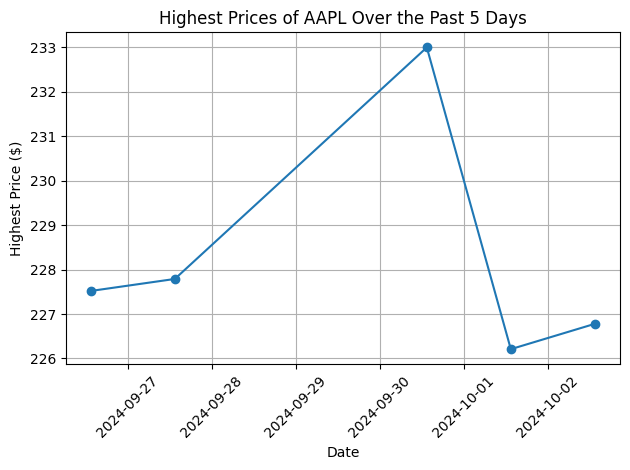

In [31]:
# Define the stock and the parameters for the historical data
params = {
    "symbols": stock_input,
    "range": "5d",
    "interval": "1d"
}

# Set up the request headers with the API key
headers = {
    'x-api-key': apikey
    }

# Make the API call to get historical data
response = requests.get(historical_url, headers=headers, params=params)

# Check if the connnection to historical data is correct
if response.status_code == 200:
    historical_data = response.json()

    # Check if the symbol inputted does exist
    if stock_input in historical_data:

        # Extract the timestamp and the high prices
        timestamps = historical_data[stock_input]['timestamp']
        high_prices = historical_data[stock_input]['close']

        # Convert the timestamps to dates
        dates = pd.to_datetime(timestamps, unit='s')

        # Plot the high price values over the past 5 days
        plt.plot(dates, high_prices, marker='o')
        plt.title(f'Highest Prices of {stock_input} Over the Past 5 Days')
        plt.xlabel('Date')
        plt.ylabel('Highest Price ($)')
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Error: No data found for the stock.")
else:
    print(f"Error: Unable to retrieve historical data.")